In [59]:
# Import modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# WEIGHTLIFTING DATA ------------------------------------------------------------------------
# Import data & clean
# From: https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018/

weightDF = pd.read_csv("./weightlifting medals.csv")

display(weightDF)


# HEALTHY DIET DATA ------------------------------------------------------------------------
# Import data from cleaned csv
# From: https://databank.worldbank.org/source/food-prices-for-nutrition

columns = ['country_name', 'country_code', 'year', 'population', 'millions_healthy_diet','millions_nutrient','millions_calories','percent_healthy_diet','percent_nutrient','percent_calories','affordability_energy','affordability_nutrient','affordability_healthy_diet']

DFDiet = pd.read_csv("./healthy diet.csv", names=columns, header=0)

display(DFDiet)

,oly_game,event_title,event_gender,medal_type,athlete_full_name,country_name,country_code,year
0,tokyo-2020,Men's 61kg,Men,SILVER,Eko Yuli IRAWAN,Indonesia,INA,2020
1,tokyo-2020,Men's 61kg,Men,GOLD,Fabin LI,People's Republic of China,CHN,2020
2,tokyo-2020,Men's 61kg,Men,BRONZE,Igor SON,Kazakhstan,KAZ,2020
3,tokyo-2020,Women's 55kg,Women,SILVER,Qiuyun LIAO,People's Republic of China,CHN,2020
4,tokyo-2020,Women's 55kg,Women,BRONZE,Zulfiya CHINSHANLO,Kazakhstan,KAZ,2020
...,...,...,...,...,...,...,...,...
674,athens-1896,heavyweight - one hand lift men,Men,SILVER,Viggo JENSEN,Denmark,DEN,1896
675,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Alexandros Nikolopoulos,Greece,GRE,1896
676,athens-1896,heavyweight - two hand lift men,Men,GOLD,Viggo JENSEN,Denmark,DEN,1896
677,athens-1896,heavyweight - two hand lift men,Men,SILVER,Launceston ELLIOT,Great Britain,GBR,1896


,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet
0,Albania,ALB,2017.0,2873457.0,0.9,0.3,0.0,31.3,8.9,0.0,0.078,0.266,0.425
1,Albania,ALB,2018.0,2866376.0,0.7,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,2019.0,2854191.0,0.6,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,2020.0,2837849.0,0.6,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2021.0,2811666.0,0.4,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Zimbabwe,ZWE,2017.0,14751101.0,10.0,1.6,0.0,67.8,10.6,0.0,0.106,0.314,0.973
926,Zimbabwe,ZWE,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,Zimbabwe,ZWE,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,Zimbabwe,ZWE,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1> Graph 1 with analysis </h1>

<h3> Distribution of average population over 2017-2021 for the top 20 most-populated countries </h3>

In [61]:
DFDiet.head()

,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet
0,Albania,ALB,2017.0,2873457.0,0.9,0.3,0.0,31.3,8.9,0.0,0.078,0.266,0.425
1,Albania,ALB,2018.0,2866376.0,0.7,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,2019.0,2854191.0,0.6,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,2020.0,2837849.0,0.6,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2021.0,2811666.0,0.4,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN


In [62]:
DFDiet_filtered = DFDiet.iloc[:, :-9]
DFDiet_filtered.head()

,country_name,country_code,year,population
0,Albania,ALB,2017.0,2873457.0
1,Albania,ALB,2018.0,2866376.0
2,Albania,ALB,2019.0,2854191.0
3,Albania,ALB,2020.0,2837849.0
4,Albania,ALB,2021.0,2811666.0


In [110]:


countries_to_exclude = ['South Asia', 'North America', 'Middle East & North Africa', 'Low income', 'Latin America & Caribbean', 'Europe & Central Asia', 'Sub-Saharan Africa', 'High income', 'East Asia & Pacific', 'Upper middle income', 'Lower middle income', 'WORLD']  # Add more countries if needed

# Filter out the countries to exclude
DFDiet_filtered = DFDiet[~DFDiet['country_name'].isin(countries_to_exclude)]

average_population = DFDiet_filtered.groupby('country_name')['population'].mean()

# Sort the countries based on their average population
sorted_average_population = average_population.sort_values(ascending=False)

# Select the top 20 countries with the highest average population
top_20_countries = sorted_average_population.head(20)

top_20_countries




country_name
China                 1.406036e+09
India                 1.382052e+09
United States         3.287667e+08
Indonesia             2.693519e+08
Pakistan              2.236007e+08
Brazil                2.115954e+08
Nigeria               2.033834e+08
Bangladesh            1.655543e+08
Russian Federation    1.441807e+08
Japan                 1.264717e+08
Mexico                1.249284e+08
Ethiopia              1.141844e+08
Philippines           1.103519e+08
Egypt, Arab Rep.      1.055752e+08
Vietnam               9.576816e+07
Congo, Dem. Rep.      9.000496e+07
Iran, Islamic Rep.    8.638009e+07
Türkiye               8.345833e+07
Germany               8.300254e+07
Thailand              7.128211e+07
Name: population, dtype: float64

In [98]:
top20 = ['China', 'India', 'United States', 'Indonesia', 'Pakistan','Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan','Mexico', 'Ethiopia', 'Philippines', 'Egypt, Arab Rep.', 'Vietnam','Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Türkiye', 'Germany', 'Thailand']


In [97]:
columns_to_keep = ['country_name', 'country_code', 'year', 'population', 'percent_healthy_diet']
DFDiet_filtered2 = DFDiet_filtered[columns_to_keep]

filtered_df = DFDiet_filtered2[DFDiet_filtered2['country_name'].isin(top20)]

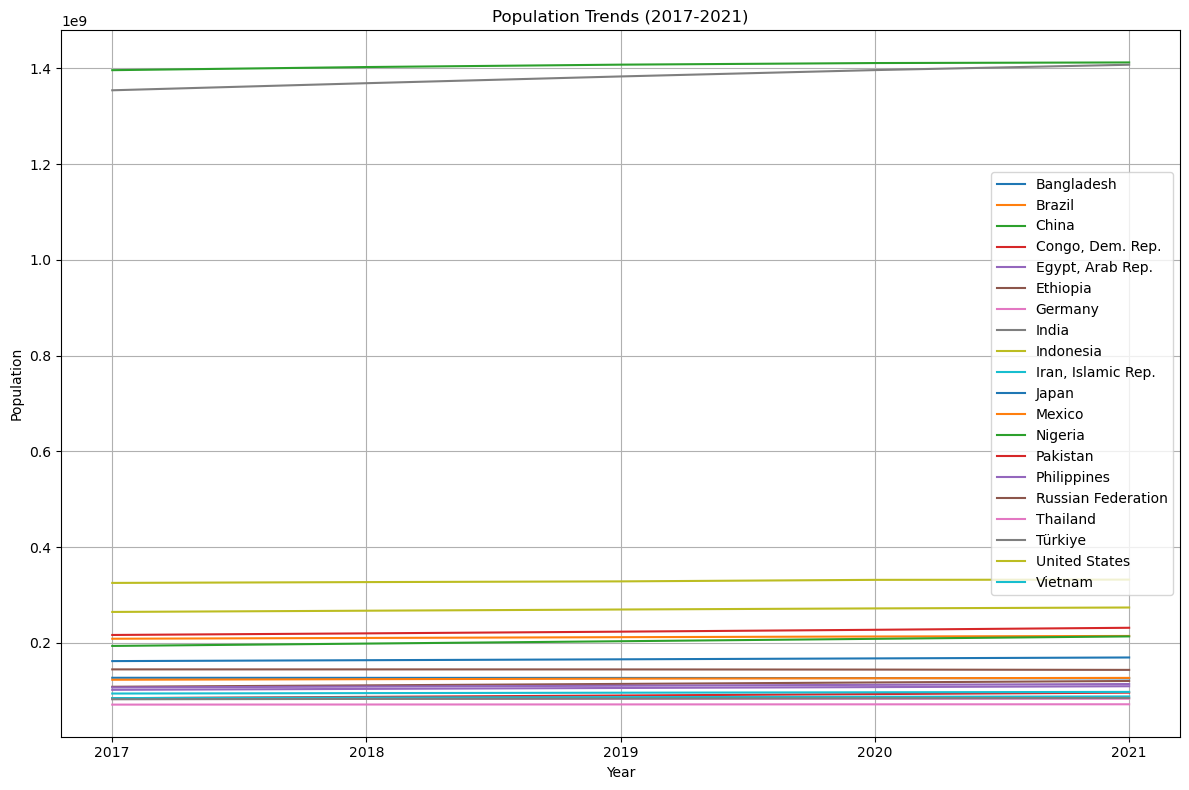

In [96]:
grouped_by_country = filtered_df.groupby('country_name')

# Plotting
plt.figure(figsize=(12, 8))  # Set the size of the plot

# Iterate through each group (country) and plot its population over the years
for country, data in grouped_by_country:
    plt.plot(data['year'], data['population'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends (2017-2021)')
plt.legend()  # Show legend with country names

plt.grid(True)  # Add grid lines
plt.xticks(range(2017, 2022))  # Set ticks for x-axis to show years
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

### Discussion:

1) This graph illustrates the population trends from 2017 to 2021 across the top 20 countries with the largest populations. Each line represents a country, tracing its population changes over the five-year period. China and India have the most people, each with about 1.4 billion. That's a lot considering there are around 8 billion people on Earth. The USA is third with about 330 million people. It's interesting that only one European country, Germany, is in the top 20. Germany has around 83 million people. With making this graph, I was hoping to see some movement in nation's populations, but because the countries have such different populations, it's hard to zoom in and see any changes clearly. This suggests that the populations of these countries have mostly stayed the same.

<h1> Graph 2 with analysis </h1>

<h3> Percentage healthy diet Trends (2017-2021) for the top 20 worst countries </h3>

In [137]:
DFDiet_filtered

,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet
0,Albania,ALB,2017.0,2873457.0,0.9,0.3,0.0,31.3,8.9,0.0,0.078,0.266,0.425
1,Albania,ALB,2018.0,2866376.0,0.7,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,2019.0,2854191.0,0.6,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,2020.0,2837849.0,0.6,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2021.0,2811666.0,0.4,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Zimbabwe,ZWE,2017.0,14751101.0,10.0,1.6,0.0,67.8,10.6,0.0,0.106,0.314,0.973
926,Zimbabwe,ZWE,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,Zimbabwe,ZWE,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,Zimbabwe,ZWE,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:


average_healthy_diet = DFDiet_filtered.groupby('country_name')['percent_healthy_diet'].mean()

# Sort the countries based on their average population
sorted_average_healthy_diet = average_healthy_diet.sort_values(ascending=False)

# Select the top 20 countries with the highest average population
top_20_countriesDiet = sorted_average_healthy_diet.head(20)

top_20_countriesDiet

country_name
Madagascar                  97.42
Central African Republic    95.58
Burundi                     95.48
Malawi                      95.28
Mozambique                  93.66
Nigeria                     91.98
Liberia                     91.84
Niger                       91.52
Sudan                       90.52
Congo, Rep.                 90.18
Congo, Dem. Rep.            89.40
Zambia                      89.20
Guinea                      88.74
Haiti                       86.94
Lesotho                     85.64
Tanzania                    85.26
Benin                       84.94
Angola                      84.58
Burkina Faso                84.42
Guinea-Bissau               84.14
Name: percent_healthy_diet, dtype: float64

In [139]:
Top20Diet = ["Madagascar","Central African Republic","Burundi","Malawi","Mozambique","Nigeria","Liberia","Niger","Sudan","Congo, Rep.","Congo, Dem. Rep.""Zambia","Guinea","Haiti","Lesotho","Tanzania", "Benin","Angola","Burkina Faso","Guinea-Bissau"]

filtered_dfDiet = DFDiet_filtered[DFDiet_filtered['country_name'].isin(Top20Diet)]
filtered_dfDiet

,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet
10,Angola,AGO,2017.0,30208628.0,24.6,21.5,10.9,81.5,71.2,36.1,0.315,0.726,0.972
11,Angola,AGO,2018.0,31273533.0,25.9,NaN,NaN,82.7,NaN,NaN,NaN,NaN,NaN
12,Angola,AGO,2019.0,32353588.0,27.1,NaN,NaN,83.9,NaN,NaN,NaN,NaN,NaN
13,Angola,AGO,2020.0,33428486.0,29.0,NaN,NaN,86.7,NaN,NaN,NaN,NaN,NaN
14,Angola,AGO,2021.0,34503774.0,30.4,NaN,NaN,88.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,Tanzania,TZA,2017.0,56267032.0,48.3,42.5,20.7,85.9,75.6,36.8,0.374,0.731,0.976
841,Tanzania,TZA,2018.0,58090443.0,49.7,NaN,NaN,85.5,NaN,NaN,NaN,NaN,NaN
842,Tanzania,TZA,2019.0,59872579.0,50.8,NaN,NaN,84.8,NaN,NaN,NaN,NaN,NaN
843,Tanzania,TZA,2020.0,61704518.0,52.5,NaN,NaN,85.1,NaN,NaN,NaN,NaN,NaN


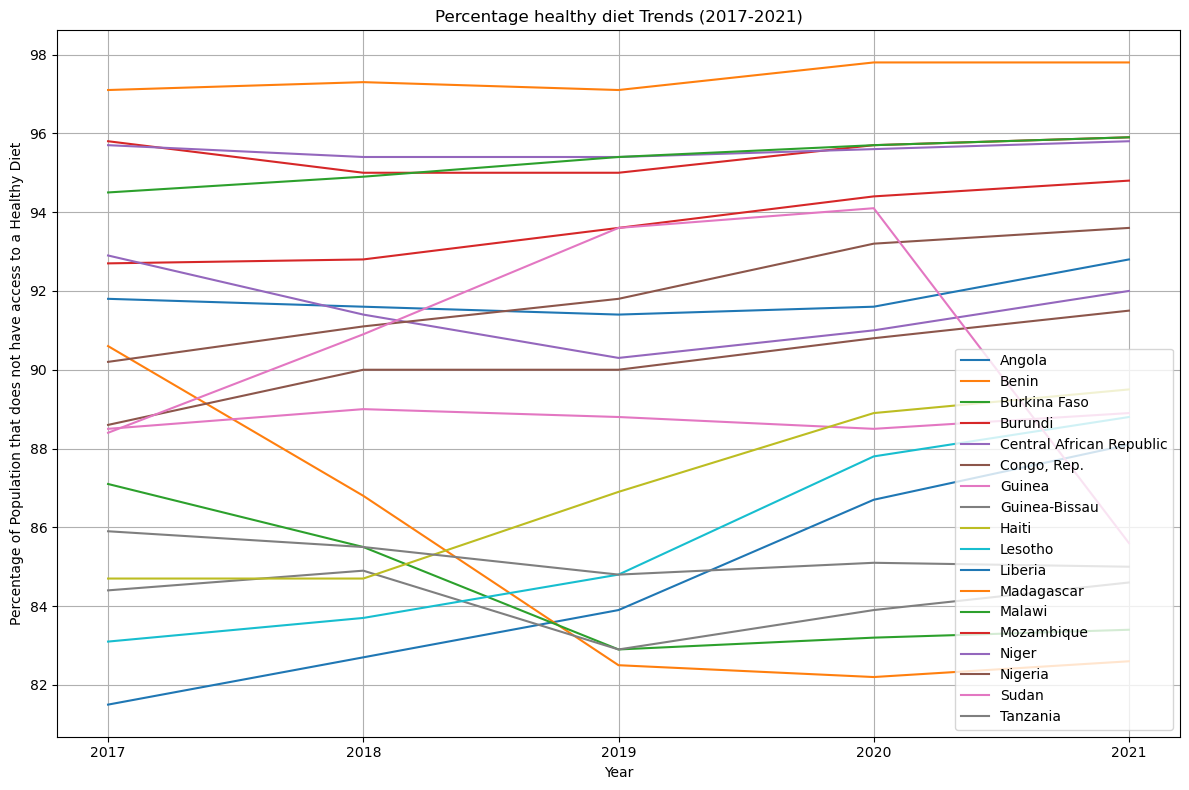

In [140]:
grouped_by_countryDiet = filtered_dfDiet.groupby('country_name')

# Plotting
plt.figure(figsize=(12, 8))  # Set the size of the plot

# Iterate through each group (country) and plot its population over the years
for country, data in grouped_by_countryDiet:
    plt.plot(data['year'], data['percent_healthy_diet'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Population that does not have access to a Healthy Diet')
plt.title('Percentage healthy diet Trends (2017-2021)')
plt.legend()  # Show legend with country names

plt.grid(True)  # Add grid lines
plt.xticks(range(2017, 2022))  # Set ticks for x-axis to show years
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

### Discussion:

1) This graph shows how the percentage of people without access to a healthy diet changed in different countries, specifically focusing on the top 20 nations with the highest percentages, from 2017 to 2021. In contrast with the previous graph, now we can actually see fluctuations and changes in the percentage of the population that has access to a healthy diet. When lines slope downward, it indicates a decrease in the number of individuals without access to a healthy diet. Conversely, when lines incline upward, it signifies an increase in the proportion of people facing challenges in maintaining a healthy diet.

2) More specifically, in this graph, we can see that Madagascar has the worst percentage (97.42%) of every country in the world. This means that only 2.58% of their population has access to a healthy diet. We also observe a significant decrease in the percentage for Benin from 2017 to 2019, followed by a period of stagnation. Additionally, Guinea experienced a notably steep decline from 2020 to 2021. These declines can be explained by numerous reasons. One of them could be the implementation of government policies or initiatives aimed at improving food security and nutrition. Additionally, we can also derive from the graph that Haiti, Lesotho and Liberia are all in an upward trend from 2017-2021. All other countries are not significantly changing. 

<h1> Graph 3 with analysis </h1>

<h3> Per </h3>

In [128]:
filtered_df_2021 = DFDiet_filtered[DFDiet_filtered['year'] == 2021]


In [134]:
filtered_df_2021_excluding_china_india = filtered_df_2021[(filtered_df_2021['country_name'] != 'China') & (filtered_df_2021['country_name'] != 'India')]


In [145]:
countries_in_both = set(top20) & set(Top20Diet)
countries_in_both

{'Nigeria'}

In [164]:
xdata = filtered_df_2021_excluding_china_india['population']
ydata = filtered_df_2021_excluding_china_india['percent_healthy_diet']

mask = np.logical_and(~np.isnan(xdata), ~np.isnan(ydata))
xdata_masked = xdata[mask]
ydata_masked = ydata[mask]

lmf,lmcov = np.polyfit(xdata_masked, ydata_masked, 1,    # polynomial degree (1 -> linear)
                     cov=True)           # option to return covariance matrix which
lme = np.sqrt(np.diag(lmcov))            #       is used to calculate uncertainties

print("intercept = %f +/- %f"%(lmf[1],lme[1]))
print("slope     = %f +/- %f"%(lmf[0],lme[0]))

# myfit[0] is our slope, myfit[1] is our y-intercept. y=mx+b

# Create a line from the fit slope and intercept...
xtheor = np.linspace(min(xdata_masked), max(xdata_masked), 100)
ytheor= lmf[0]*xtheor + lmf[1]


intercept = 34.289029 +/- 3.484225
slope     = 0.000000 +/- 0.000000


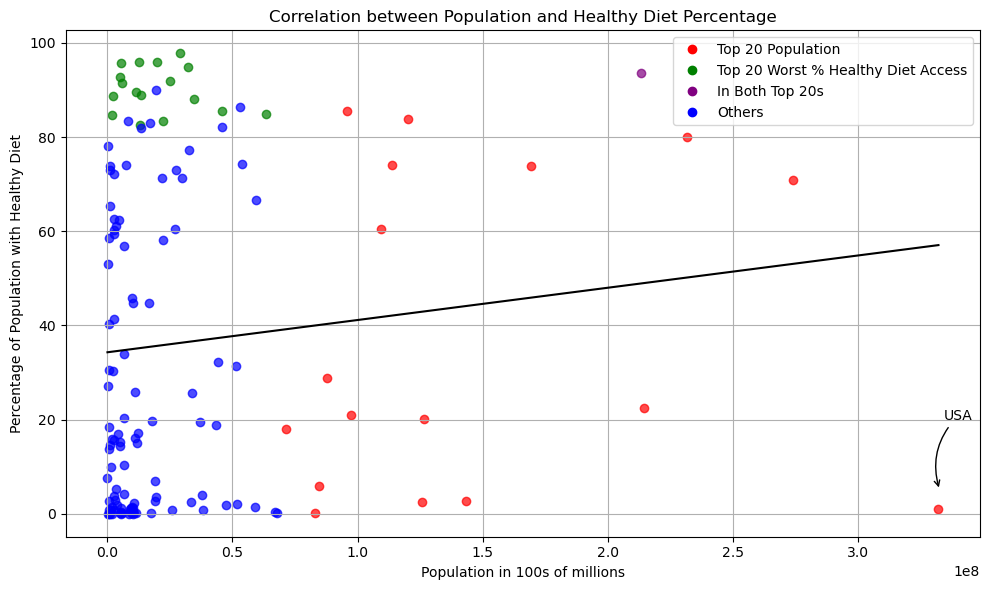

In [173]:
plt.figure(figsize=(10, 6))  # Set the size of the plot


# Scatter plot
for index, row in filtered_df_2021_excluding_china_india.iterrows():
    if row['country_name'] in countries_in_both:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='purple', alpha=0.7, label='In Both Top 20s')
    elif row['country_name'] in top20:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='red', alpha=0.7, label='Top 20 Population')
    elif row['country_name'] in Top20Diet:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='green', alpha=0.7, label='Top 20 Worst % Healthy Diet Access')
    else:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='blue', alpha=0.7, label='Others')
        
plt.plot(xtheor,ytheor,color='black',label='Linear Model Fit')

# Add labels and title
plt.xlabel('Population in 100s of millions')
plt.ylabel('Percentage of Population with Healthy Diet')
plt.title('Correlation between Population and Healthy Diet Percentage')

plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap

plt.legend(handles=[
    plt.Line2D([], [], marker='o', color='red', label='Top 20 Population', linestyle='None'),
    plt.Line2D([], [], marker='o', color='green', label='Top 20 Worst % Healthy Diet Access', linestyle='None'),
    plt.Line2D([], [], marker='o', color='purple', label='In Both Top 20s', linestyle='None'),
    plt.Line2D([], [], marker='o', color='blue', label='Others', linestyle='None')
])

plt.annotate('USA',xy=(332500000,5),xytext=(340000000,20),
             arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.3'}
             ,horizontalalignment='center')     

# Show the plot
plt.show()

### Discussion:

1) The scatter plot shows us the correlation between a country's population size and the percentage of its population with a healthy diet. Each point on the plot represents a specific country in the year 2021, with the x-axis denoting the population size and the y-axis indicating the percentage of the population with a healthy diet. I chose for the year 2021 because it is the most recent data available. I also decided to exclude China and India due to their significantly large populations, which could skew the analysis as outliers. The red marks represent countries among the top 20 with the largest populations, while the green marks denote countries within the top 20 with the highest percentages of their populations lacking access to a healthy diet. Nigeria is depicted by a purple dot, as it belongs to both top 20 categories.

2) More specifically, we can derive a couple of things from this graph. First of all, we can see that there is a positive correlation between a country's population and healthy diet percentage as the linear model is upward sloping. This means that if a country has a large population, we predict the country to have a pretty high % of the population with a lack of access to a healthy diet. Also interesting to note is that the USA is the red dot on the bottom right.